<a href="https://colab.research.google.com/github/JanhviDeshmukh/LGMVIP-DataScience/blob/main/Beginner/Task-01/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LGM VIRTUAL INTERNSHIP PROGRAM 2021**

**Beginner Level Task 01 - Iris Flowers Classification ML Project**

Domain - Data Science Intern

Code written By - Janhvi Deshmukh

**Importing Libraries**

In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Reading the data from csv file**

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


**Describe function gives numeric value of count, mean, max, min, etc**

In [74]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.size

750

In [6]:
data.shape

(150, 5)

**It gives the datatype**

In [7]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**Getting Information about Data**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Data points count value for each species**

In [10]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**Exploratory Data Analysis**

**Histogram for Sepal length**

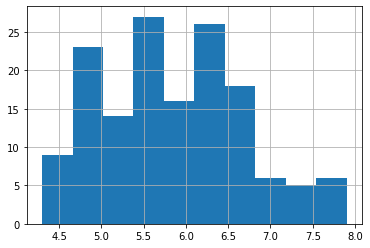

In [14]:
data['SepalLengthCm'].hist()

**Histogram for Sepal width**

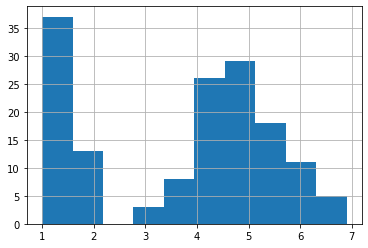

In [15]:
data['PetalLengthCm'].hist()

**Histogram for Petal length**

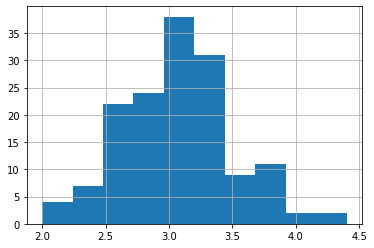

In [16]:
data['SepalWidthCm'].hist()

**Histogram for Petal Width**

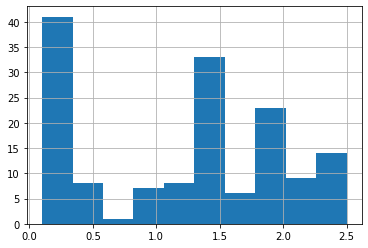

In [17]:
data['PetalWidthCm'].hist()

**ScatterPlot** [for Sepal length and sepal width]

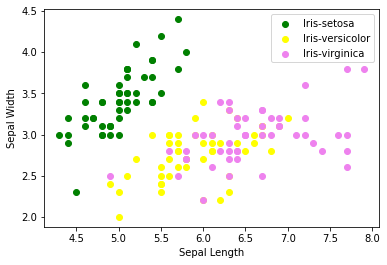

In [25]:
colors = ['green', 'yellow', 'violet']
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
  x = data[data['Species'] == Species[i]]
  plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c = colors[i], label = Species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

**ScatterPlot** [for Petal length and Petal width]

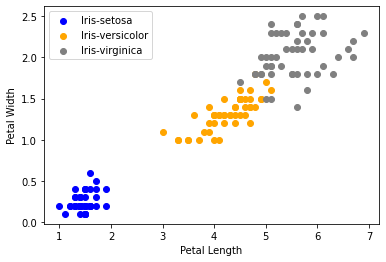

In [27]:
colors = ['blue' , 'orange', 'grey']
Species =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for i in range(3):
  x = data[data['Species'] == Species[i]]
  plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=Species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

**Coorelation Matrix**

In [28]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


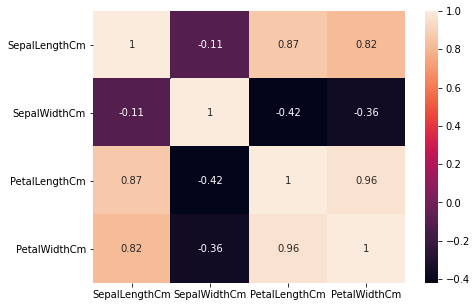

In [34]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, annot=True, ax=ax)

**Violin Plot**

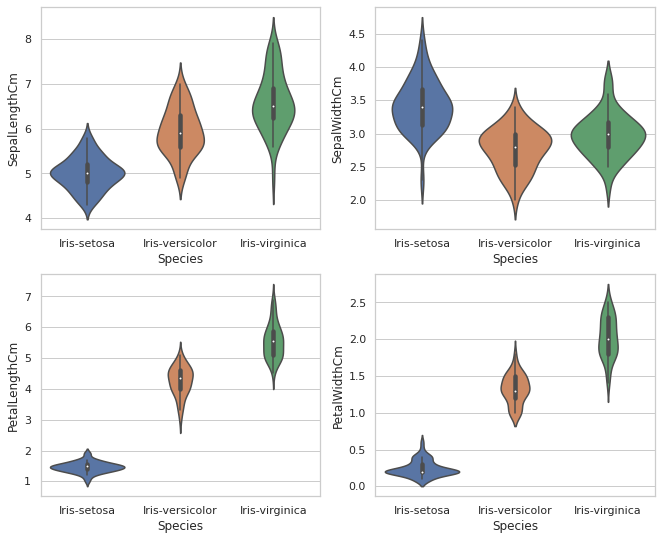

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(11,9))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.show()



**Model Training**

In [44]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Species'])
Y = data['Species']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

**Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [46]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Check the Accuracy Score of Logistic Regression**

In [47]:
print("Accuracy : ", model.score(x_test, y_test)*100)

Accuracy :  97.77777777777777


**K-Nearest Neighbors**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [62]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        19

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



**Confusion matrix**

In [61]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 19]]


**Check the Accuracy score of K-Nearest Neighbours**

In [50]:
print("Accuracy : ",model.score(x_test, y_test) * 100)

Accuracy :  95.55555555555556


**Decision Tree**

In [51]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00        14
 Iris-virginica       1.00      1.00      1.00        19

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



**Confusion Matrix**

In [64]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 19]]


**Check the Accuracy score of Decision Tree**

In [52]:
print("Accuracy : ",model.score(x_test, y_test) * 100)

Accuracy :  100.0


**Support Vector Machine**

In [65]:
from sklearn.svm import SVC

In [67]:
model = SVC()
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      1.00      0.93        14
 Iris-virginica       1.00      0.89      0.94        19

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



**Confusion Matrix**

In [78]:
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  2 17]]


**Check the Accuracy score of Support Vector Machine**

In [73]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",model.score(x_test, y_test) * 100)

Accuracy :  95.55555555555556
